In [36]:
import torch
import torch.nn as nn

import torch
from torchvision.transforms import transforms
from torchvision.models import mobilenet_v2, resnet18, vgg16
from torchray.attribution.grad_cam import grad_cam
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

MobileNetV2(
  (model): MobileNetV2(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(inplace=True)
          )
          (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (2): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 96, kernel_size=(1, 

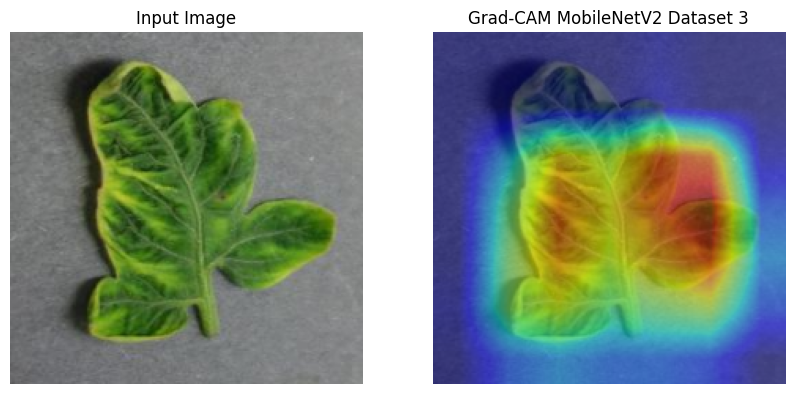

In [19]:
class MobileNetV2(nn.Module):
  def __init__(self, num_of_classes):
    super(MobileNetV2, self).__init__()
    self.model = mobilenet_v2(weights=None)
    features = self.model.classifier[-1].in_features
    self.model.classifier[-1] = nn.Linear(features, num_of_classes)

  def forward(self, x):
    x = self.model(x)
    return x

model = MobileNetV2(num_of_classes=10)
print(model)
best_model_values = torch.load('/dataset3/mobilenetv2/best_model_details.pth',  map_location=torch.device('cpu'))
model.load_state_dict(best_model_values)
last_layer = model.model.features[-1]
print(last_layer)
model.eval()

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

input_image = Image.open('/dataset_3/yellow leaf curl/0a0fe942-bb9e-4384-8466-779017d00bcf___UF.GRC_YLCV_Lab 02192.JPG')
input_tensor = transform(input_image).unsqueeze(0)

output = model(input_tensor)
output_class = torch.argmax(output)
cam = grad_cam(model, input_tensor, output_class.item(), saliency_layer=last_layer)

def plot_grad_cam(input_image, cam, alpha=0.5):

    image_np = input_image.squeeze().permute(1, 2, 0).detach().numpy()

    cam_np = cam.squeeze().detach().numpy()
    cam_np = (cam_np - cam_np.min()) / (cam_np.max() - cam_np.min())

    cam_upsampled = transforms.Resize((image_np.shape[0], image_np.shape[1]))(Image.fromarray(cam_np))
    cam_np_upsampled = np.array(cam_upsampled)

    heatmap = plt.cm.jet(cam_np_upsampled)[:,:,:3]

    superimposed_img = heatmap * alpha + (1 - alpha) * image_np

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image_np)
    plt.title('Input Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(superimposed_img)
    plt.title('Grad-CAM MobileNetV2 Dataset 3')
    plt.axis('off')

    plt.show()

plot_grad_cam(input_tensor, cam)

MobileNetV2(
  (model): MobileNetV2(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(inplace=True)
          )
          (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (2): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 96, kernel_size=(1, 

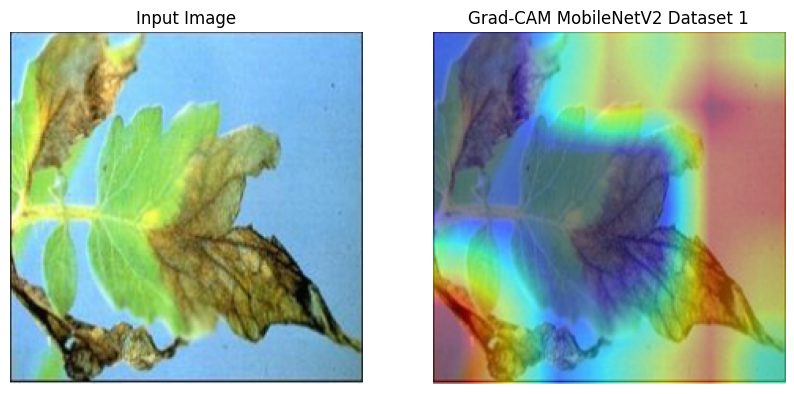

In [37]:
class MobileNetV2(nn.Module):
  def __init__(self, num_of_classes):
    super(MobileNetV2, self).__init__()
    self.model = mobilenet_v2(weights=None)
    features = self.model.classifier[-1].in_features
    self.model.classifier[-1] = nn.Linear(features, num_of_classes)

  def forward(self, x):
    x = self.model(x)
    return x

model = MobileNetV2(num_of_classes=3)
print(model)
best_model_values = torch.load('/dataset1/mobilenetv2_dataset1/best_model_details.pth',  map_location=torch.device('cpu'))
model.load_state_dict(best_model_values)
last_layer = model.model.features[-1]
print(last_layer)
model.eval()

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

input_image = Image.open('/dataset_1/late blight/Lb1.JPG')
input_tensor = transform(input_image).unsqueeze(0)

output = model(input_tensor)
output_class = torch.argmax(output)
cam = grad_cam(model, input_tensor, output_class.item(), saliency_layer=last_layer)

def plot_grad_cam(input_image, cam, alpha=0.5):

    image_np = input_image.squeeze().permute(1, 2, 0).detach().numpy()

    cam_np = cam.squeeze().detach().numpy()
    cam_np = (cam_np - cam_np.min()) / (cam_np.max() - cam_np.min())

    cam_upsampled = transforms.Resize((image_np.shape[0], image_np.shape[1]))(Image.fromarray(cam_np))
    cam_np_upsampled = np.array(cam_upsampled)

    heatmap = plt.cm.jet(cam_np_upsampled)[:,:,:3]

    superimposed_img = heatmap * alpha + (1 - alpha) * image_np

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image_np)
    plt.title('Input Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(superimposed_img)
    plt.title('Grad-CAM MobileNetV2 Dataset 1')
    plt.axis('off')

    plt.show()

plot_grad_cam(input_tensor, cam)

ResNet18(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runn

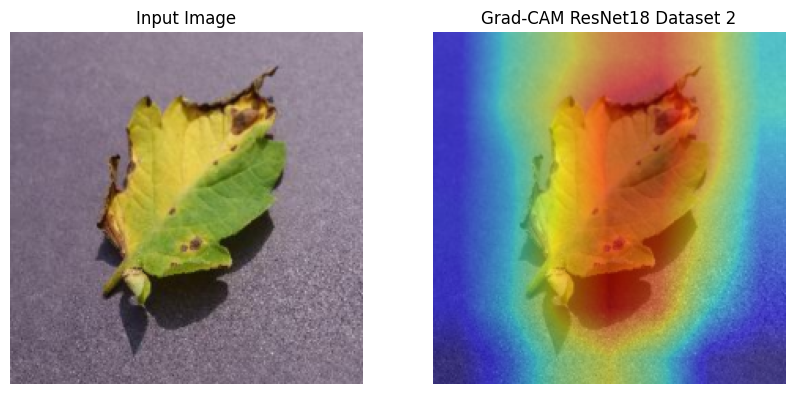

In [21]:
class ResNet18(nn.Module):
  def __init__(self, num_of_classes):
    super(ResNet18, self).__init__()
    self.model = resnet18(weights=None)
    features = self.model.fc.in_features
    self.model.fc = nn.Linear(features, num_of_classes)

  def forward(self, x):
    x = self.model(x)
    return x

model = ResNet18(num_of_classes=6)
print(model)
best_model_values = torch.load('/dataset2/resnet/best_model_details.pth',  map_location=torch.device('cpu'))
model.load_state_dict(best_model_values)
last_layer = model.model.layer4
print(last_layer)
model.eval()

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

input_image = Image.open('/dataset_2/septoria/4b712088-62f3-43ff-8358-6f07279f0b8c___Keller.St_CG 1961.JPG')
input_tensor = transform(input_image).unsqueeze(0)

output = model(input_tensor)
output_class = torch.argmax(output)
cam = grad_cam(model, input_tensor, output_class.item(), saliency_layer=last_layer)

def plot_grad_cam(input_image, cam, alpha=0.5):

    image_np = input_image.squeeze().permute(1, 2, 0).detach().numpy()

    cam_np = cam.squeeze().detach().numpy()
    cam_np = (cam_np - cam_np.min()) / (cam_np.max() - cam_np.min())

    cam_upsampled = transforms.Resize((image_np.shape[0], image_np.shape[1]))(Image.fromarray(cam_np))
    cam_np_upsampled = np.array(cam_upsampled)

    heatmap = plt.cm.jet(cam_np_upsampled)[:,:,:3]

    superimposed_img = heatmap * alpha + (1 - alpha) * image_np

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image_np)
    plt.title('Input Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(superimposed_img)
    plt.title('Grad-CAM ResNet18 Dataset 2')
    plt.axis('off')

    plt.show()

plot_grad_cam(input_tensor, cam)

VGG16(
  (model): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
      (16): Ma

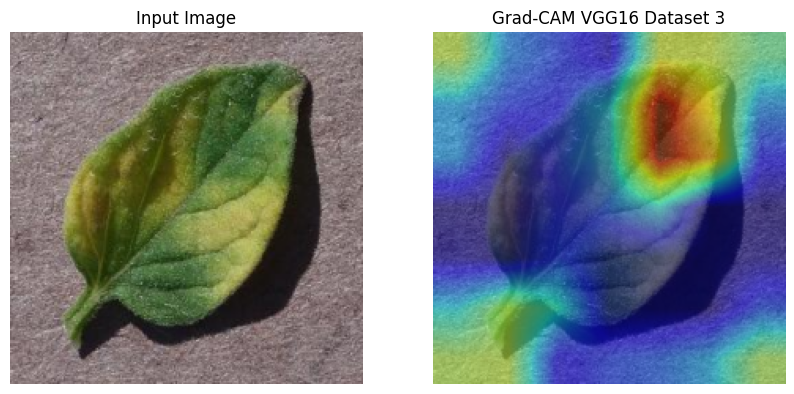

In [29]:
class VGG16(nn.Module):
  def __init__(self, num_of_classes):
    super(VGG16, self).__init__()
    self.model = vgg16(weights=None)
    features = self.model.classifier[-1].in_features
    self.model.classifier[-1] = nn.Linear(features, num_of_classes)

  def forward(self, x):
    x = self.model(x)
    return x


model = VGG16(num_of_classes=10)
print(model)
best_model_values = torch.load('/dataset3/vgg16/best_model_details.pth',  map_location=torch.device('cpu'))
model.load_state_dict(best_model_values)
last_layer = model.model.features[-1]
print(last_layer)
model.eval()

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

input_image = Image.open('/dataset_3/leaf mold/0a9b3ff4-5343-4814-ac2c-fdb3613d4e4d___Crnl_L.Mold 6559.JPG')
input_tensor = transform(input_image).unsqueeze(0)

output = model(input_tensor)
output_class = torch.argmax(output)
cam = grad_cam(model, input_tensor, output_class.item(), saliency_layer=last_layer)

def plot_grad_cam(input_image, cam, alpha=0.5):

    image_np = input_image.squeeze().permute(1, 2, 0).detach().numpy()

    cam_np = cam.squeeze().detach().numpy()
    cam_np = (cam_np - cam_np.min()) / (cam_np.max() - cam_np.min())

    cam_upsampled = transforms.Resize((image_np.shape[0], image_np.shape[1]))(Image.fromarray(cam_np))
    cam_np_upsampled = np.array(cam_upsampled)

    heatmap = plt.cm.jet(cam_np_upsampled)[:,:,:3]

    superimposed_img = heatmap * alpha + (1 - alpha) * image_np

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image_np)
    plt.title('Input Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(superimposed_img)
    plt.title('Grad-CAM VGG16 Dataset 3')
    plt.axis('off')

    plt.show()

plot_grad_cam(input_tensor, cam)